# Exploratory Data Analysis (EDA), graphical representation and predictive modeling

## Exploratory Data Analysis (EDA)

## Import libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load both train and test data

In [3]:
# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Perform EDA

In [93]:
# Display basic info
print(train_df.info())
print("***Train dataset shape is {}***".format(train_df.shape))

print(test_df.info())
print("***Test dataset shape is {}***".format(test_df.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
# Display column names and first five rows
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
# Display column names and first five rows
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [107]:
# Load the train CSV file
data = pd.read_csv('train.csv')

quantitative = [f for f in train_df.columns if train_df.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train_df.columns if train_df.dtypes[f] == 'object']

In [105]:
# List quantitative fields

print(quantitative)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [106]:
# List qualitative fields

print(qualitative)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [24]:
# Load the train CSV file
data = pd.read_csv('train.csv')

# Display summary statistics
summary = data.describe()

# Print the summary
print(summary)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [23]:
# Load the test CSV file
data = pd.read_csv('test.csv')

# Display summary statistics
summary = data.describe()

# Print the summary
print(summary)

                Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min 

In [25]:
# Check for missing values
print(train_df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [5]:
# Number of unique values in each column
print(train_df.nunique())

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64


In [18]:
# Ensure only numerical columns are considered for correlation
numerical_cols = train_df.select_dtypes(include=[np.number])
correlation_matrix = numerical_cols.corr()

# Print the correlation of features with the target 'SalePrice'
print(correlation_matrix['SalePrice'].sort_values(ascending=False))



SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [7]:
# Check distribution of target variable
print(train_df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [10]:
# Explore specific relationships
print(pd.crosstab(train_df['OverallQual'], train_df['SalePrice']))
print(train_df.groupby('OverallQual')['SalePrice'].mean())

SalePrice    34900   35311   37900   39300   40000   52000   52500   55000   \
OverallQual                                                                   
1                 0       0       0       1       0       0       0       0   
2                 0       1       0       0       0       0       0       0   
3                 0       0       1       0       0       1       0       0   
4                 1       0       0       0       1       0       1       2   
5                 0       0       0       0       0       0       0       0   
6                 0       0       0       0       0       0       0       0   
7                 0       0       0       0       0       0       0       0   
8                 0       0       0       0       0       0       0       0   
9                 0       0       0       0       0       0       0       0   
10                0       0       0       0       0       0       0       0   

SalePrice    55993   58500   ...  485000  501837  5

## 2. Graphical Representation

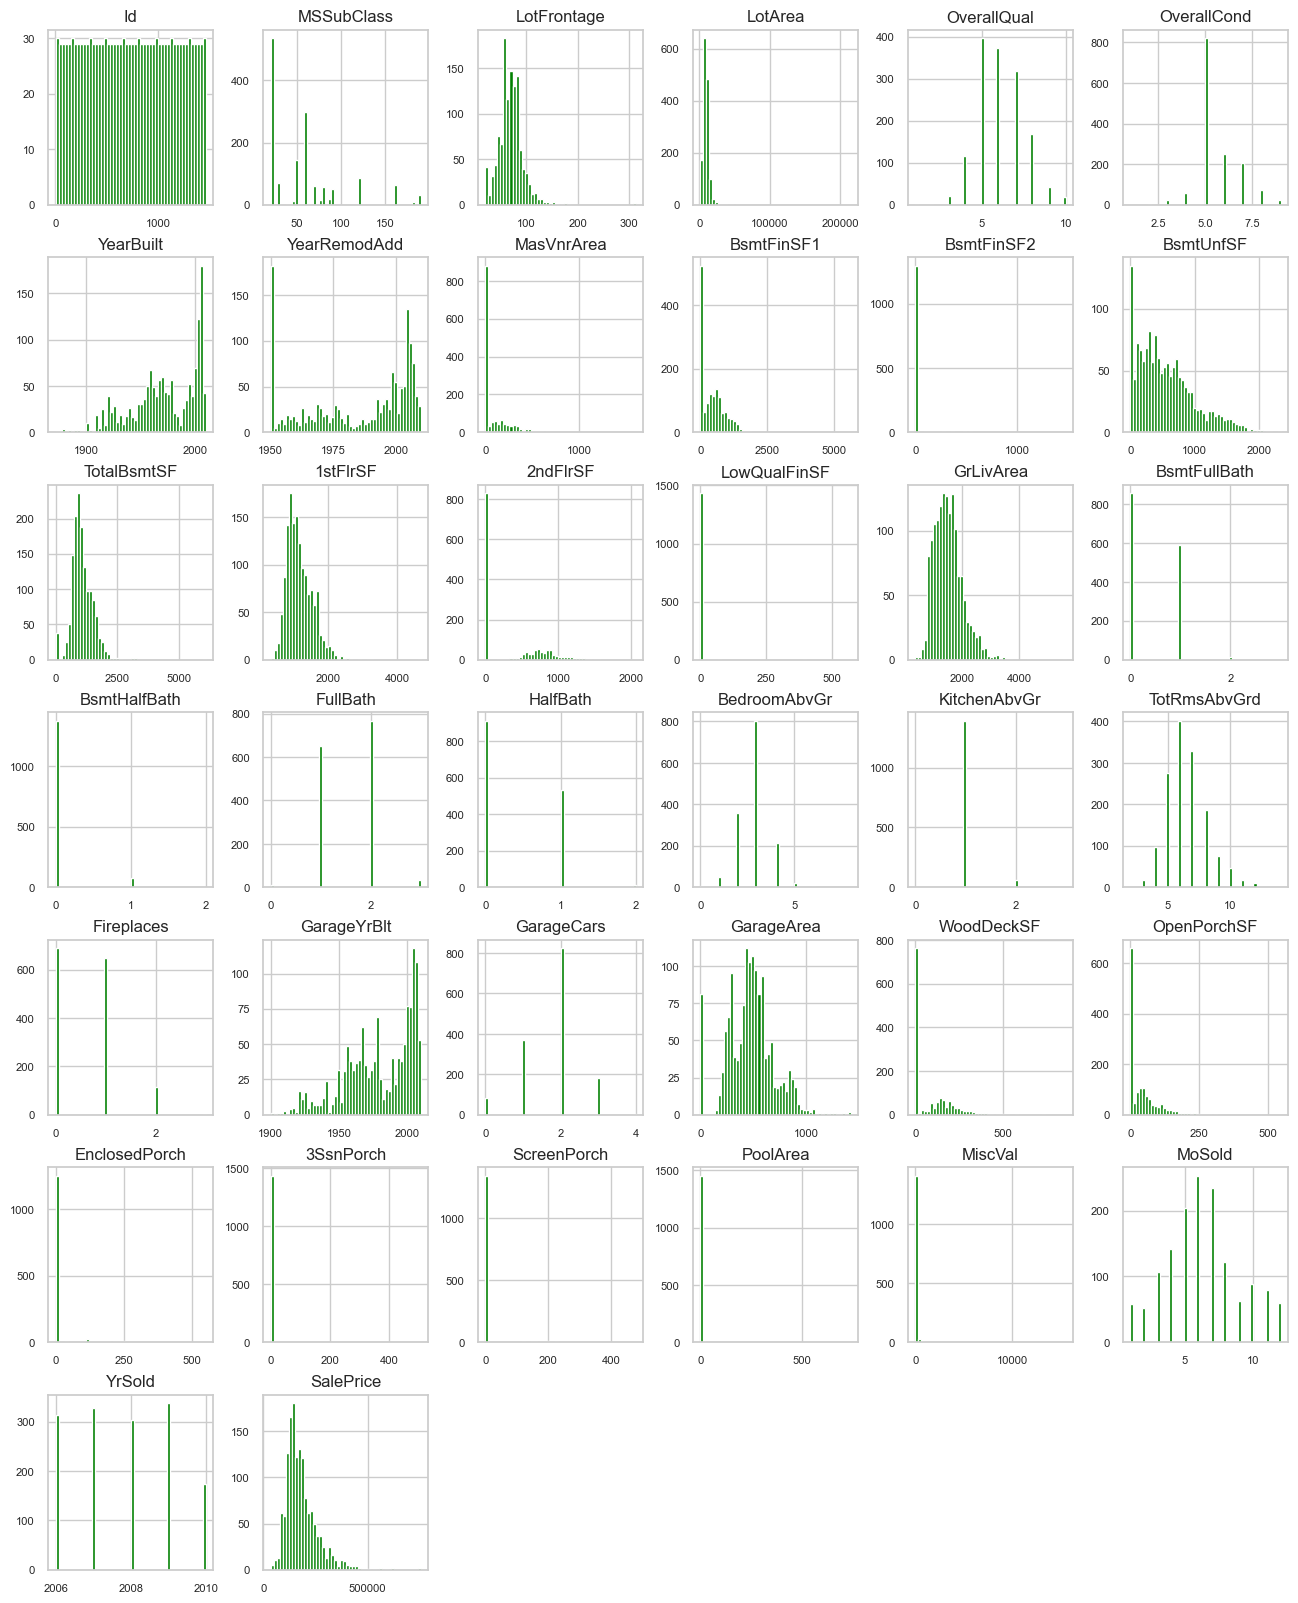

In [37]:
train_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='green');

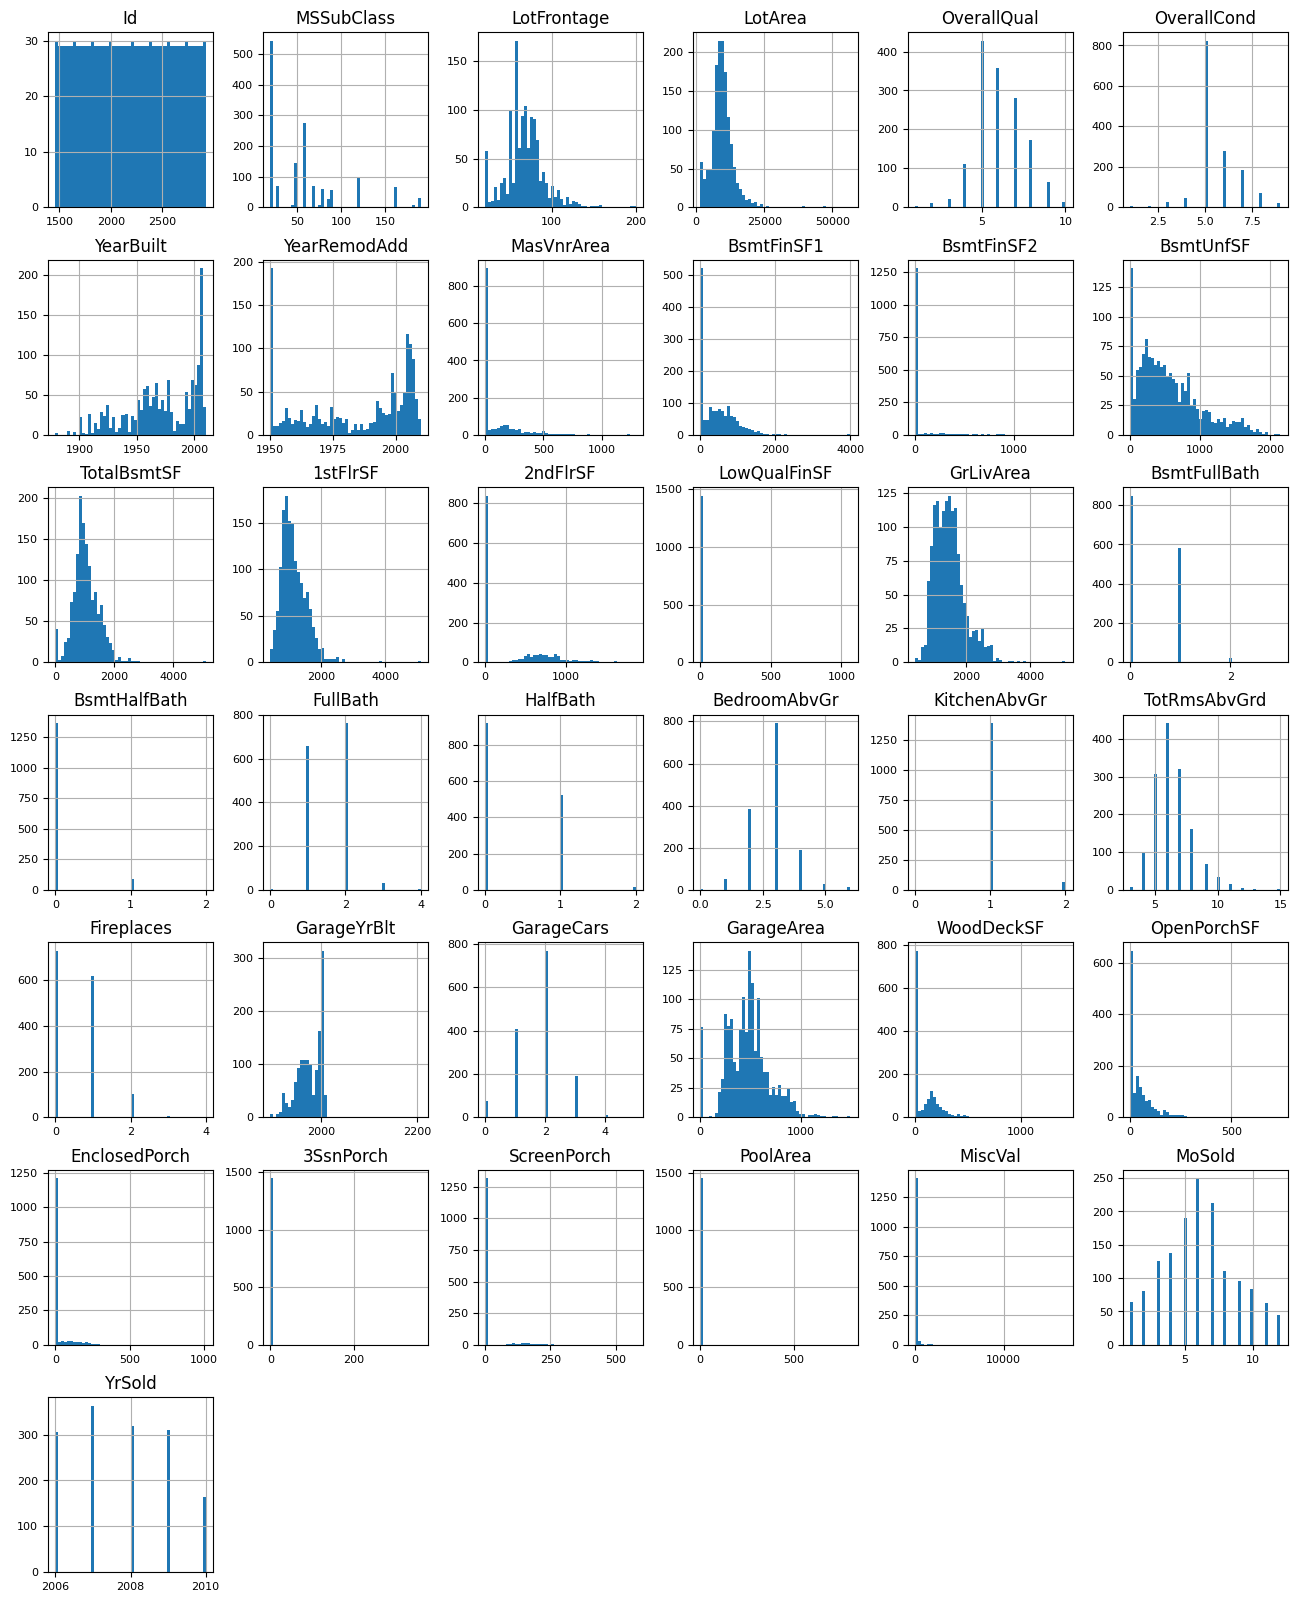

In [29]:
test_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

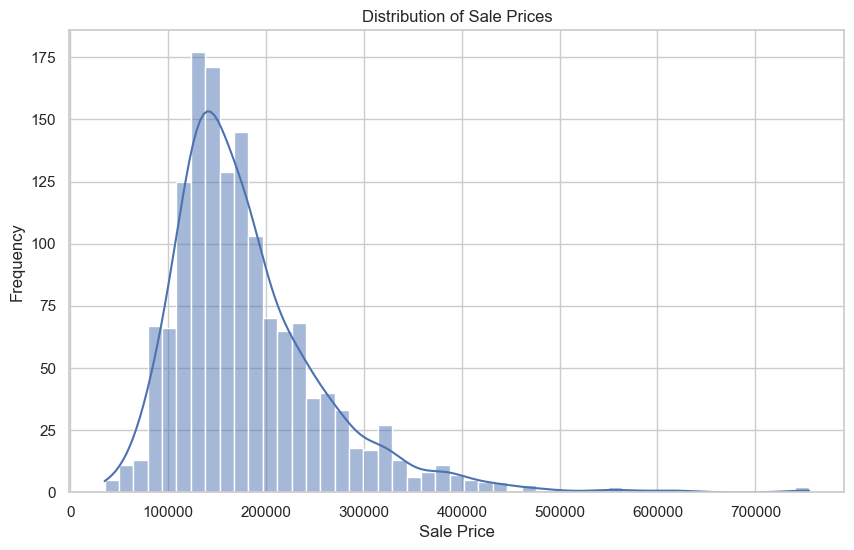

In [59]:
# Histogram of SalePrice

# Load the dataset
data = pd.read_csv('train.csv')

plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

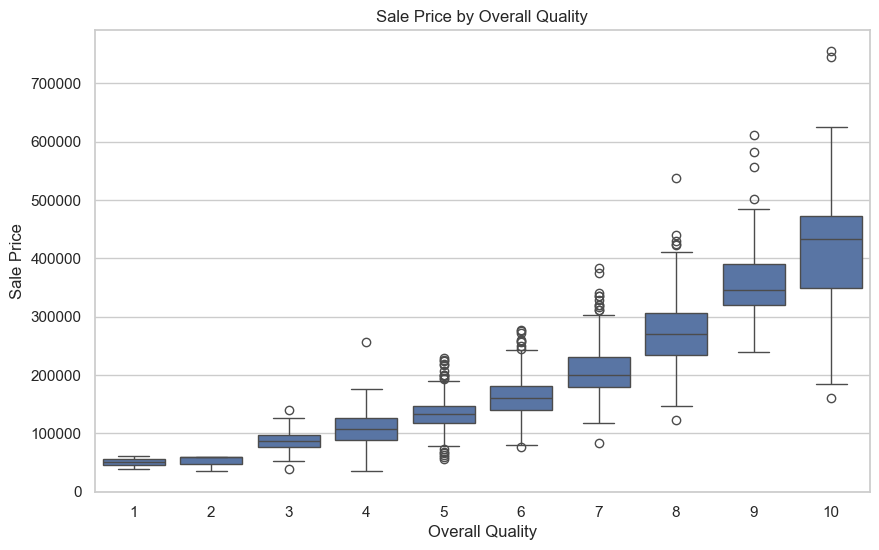

In [60]:
# Boxplot of SalePrice by OverallQual

# Load the dataset
data = pd.read_csv('train.csv')

plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

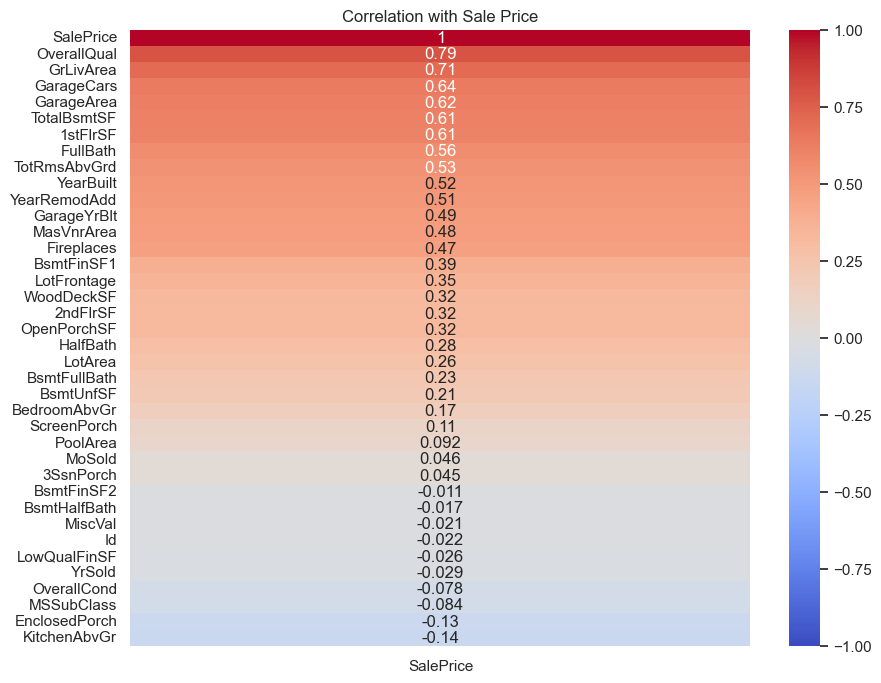

In [58]:
# Correlation with Sale Price 

# Load the dataset
data = pd.read_csv('train.csv')

# Exclude non-numeric columns from the correlation computation
numeric_data = data.select_dtypes(include=[np.number])  # only use numeric data

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Focus on the 'SalePrice' correlations
sale_price_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Visualize the correlation matrix focused on 'SalePrice'
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Sale Price')
plt.show()

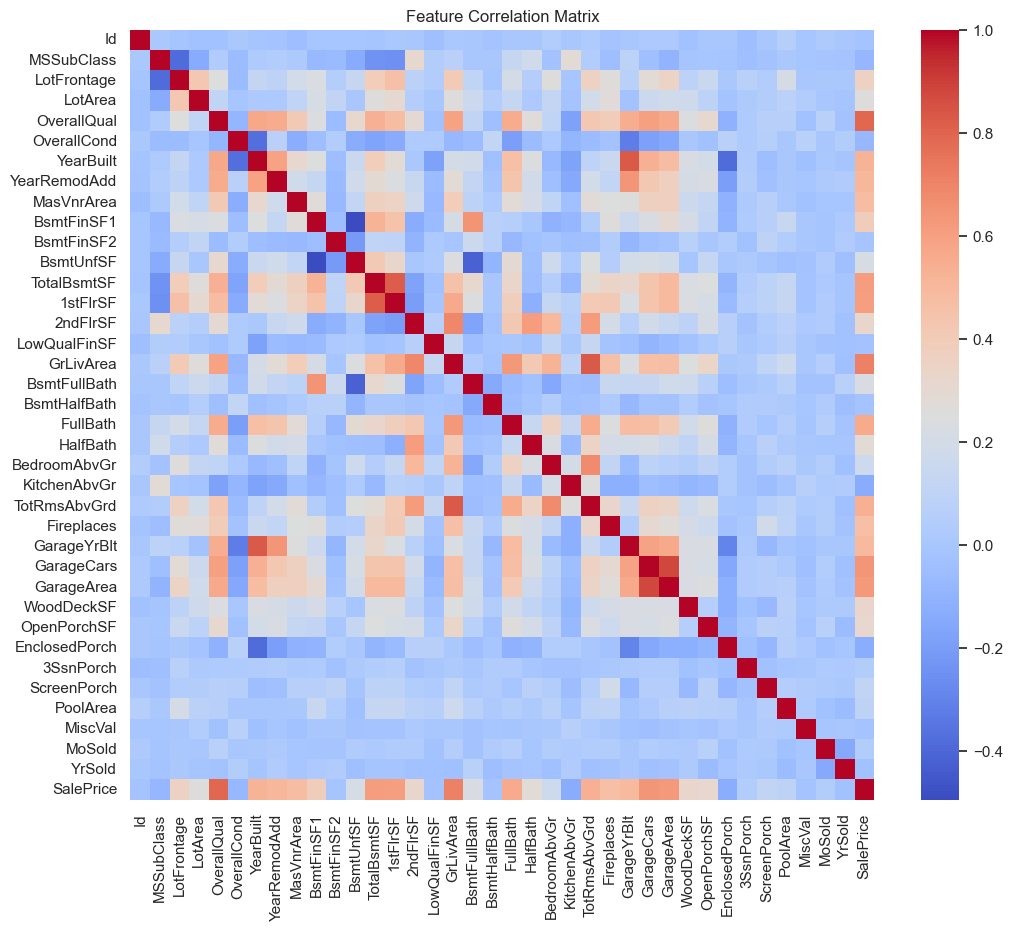

In [61]:
# Ensure only numerical columns are considered for the correlation matrix

# Load the dataset
data = pd.read_csv('train.csv')

numerical_cols = train_df.select_dtypes(include=[np.number])
correlation_matrix = numerical_cols.corr()

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

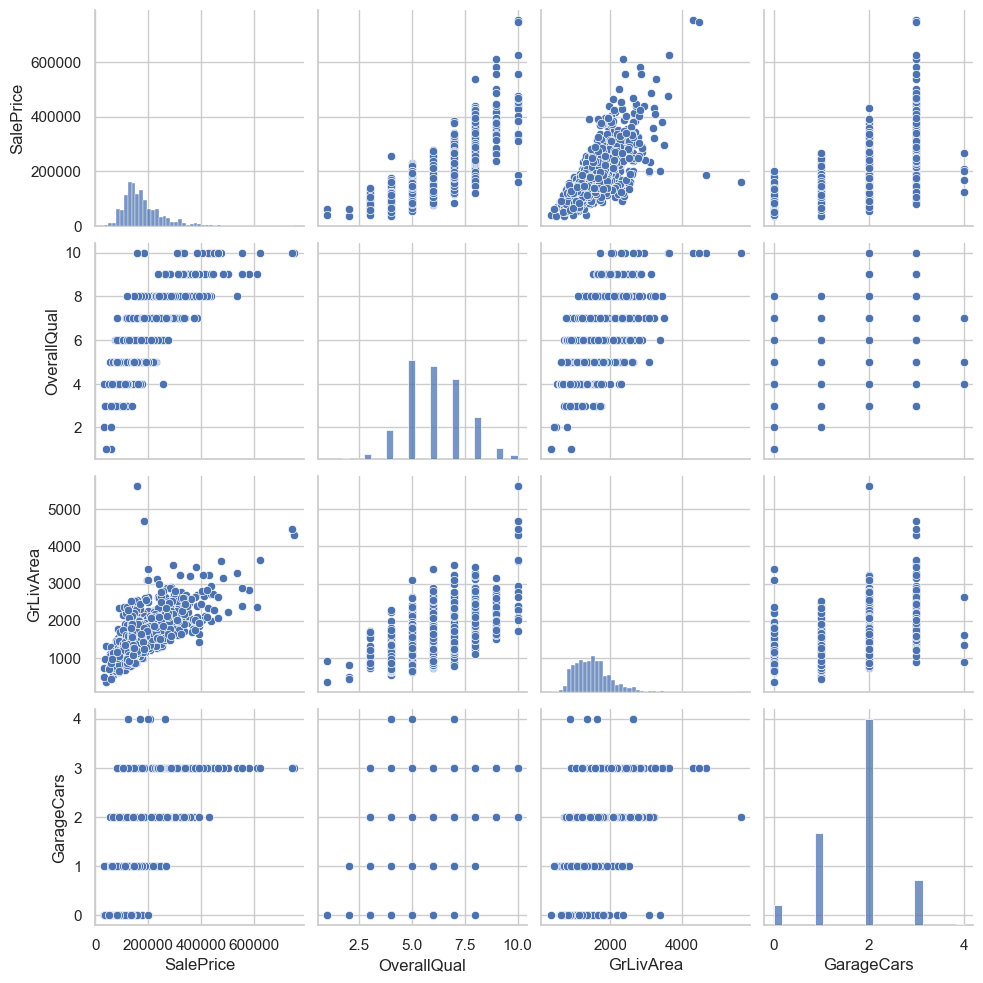

In [62]:
# Pairplot for selected features

# Load the dataset
data = pd.read_csv('train.csv')

sns.pairplot(train_df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']])
plt.show()

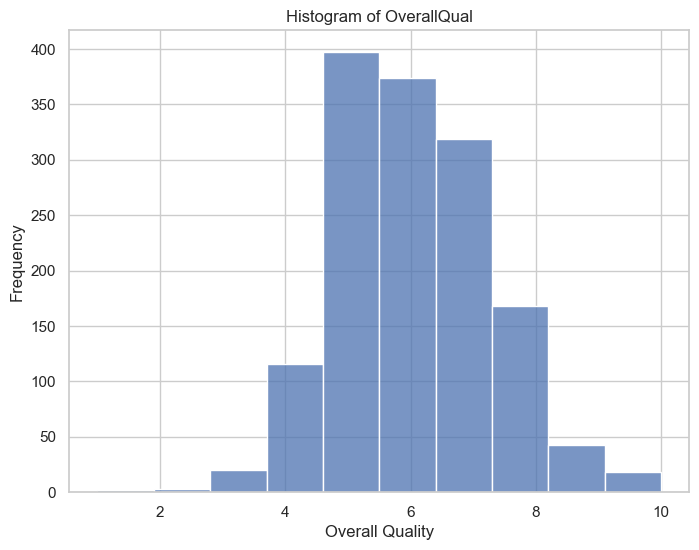

In [36]:
#  Histogram of OverallQual

test_df = pd.read_csv('test.csv')

# Set plot style
sns.set(style="whitegrid")

# Histogram of OverallQual
plt.figure(figsize=(8, 6))
sns.histplot(data['OverallQual'], bins=10, kde=False)
plt.title('Histogram of OverallQual')
plt.xlabel('Overall Quality')
plt.ylabel('Frequency')
plt.show()


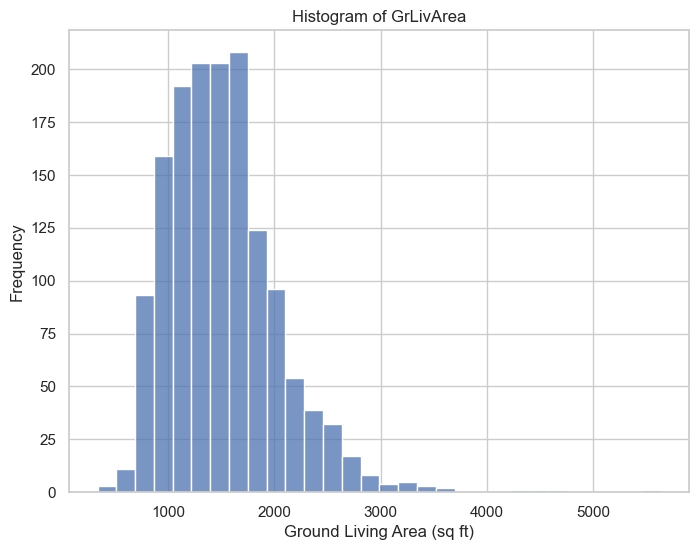

In [38]:
#  Histogram of GrLivArea

test_df = pd.read_csv('test.csv')

# Set plot style
sns.set(style="whitegrid")

# Histogram of GrLivArea
plt.figure(figsize=(8, 6))
sns.histplot(data['GrLivArea'], bins=30, kde=False)
plt.title('Histogram of GrLivArea')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Frequency')
plt.show()

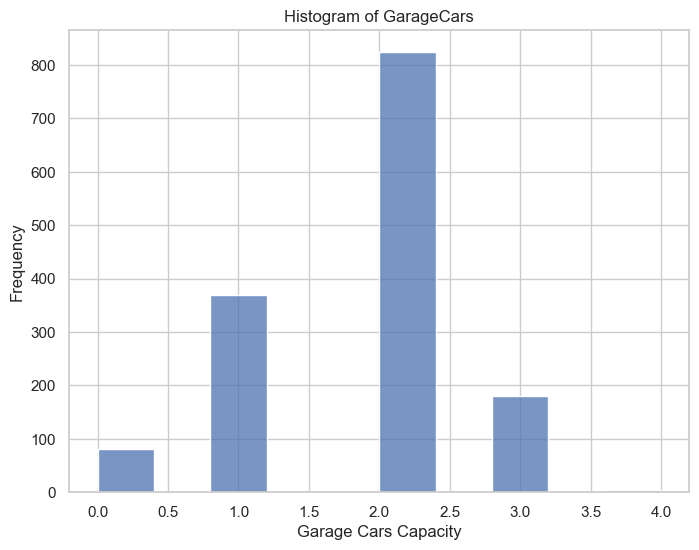

In [39]:
#  Histogram of GarageCars

test_df = pd.read_csv('test.csv')

# Set plot style
sns.set(style="whitegrid")

# Histogram of GarageCars
plt.figure(figsize=(8, 6))
sns.histplot(data['GarageCars'], bins=10, kde=False)
plt.title('Histogram of GarageCars')
plt.xlabel('Garage Cars Capacity')
plt.ylabel('Frequency')
plt.show()

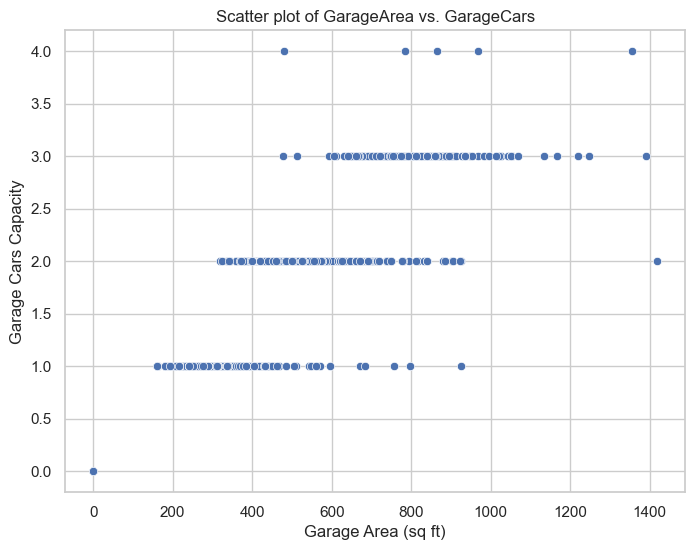

In [40]:
#  Scatter Plot of GarageArea vs GarageCars

test_df = pd.read_csv('test.csv')

# Set plot style
sns.set(style="whitegrid")

# Scatter plot of GarageArea vs GarageCars
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='GarageArea', y='GarageCars')
plt.title('Scatter plot of GarageArea vs. GarageCars')
plt.xlabel('Garage Area (sq ft)')
plt.ylabel('Garage Cars Capacity')
plt.show()

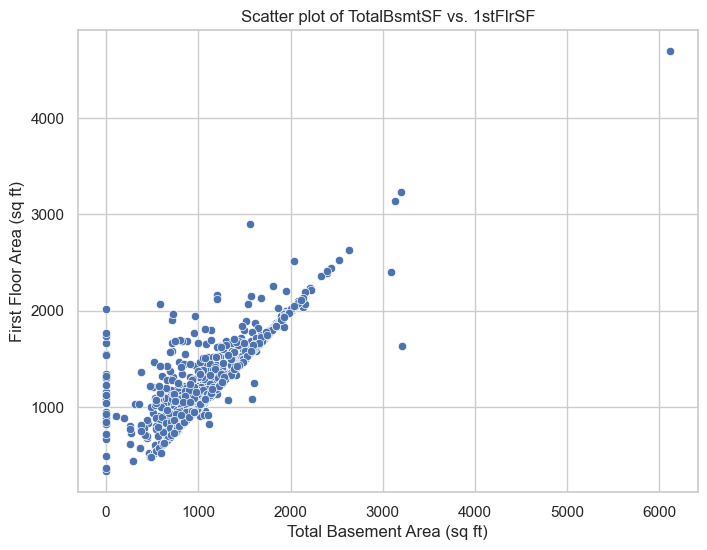

In [41]:
#  Scatter Plot of TotalBsmtSF vs 1stFlrSF

test_df = pd.read_csv('test.csv')

# Set plot style
sns.set(style="whitegrid")

# Scatter Plot of TotalBsmtSF vs 1stFlrSF
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='TotalBsmtSF', y='1stFlrSF')
plt.title('Scatter plot of TotalBsmtSF vs. 1stFlrSF')
plt.xlabel('Total Basement Area (sq ft)')
plt.ylabel('First Floor Area (sq ft)')
plt.show()

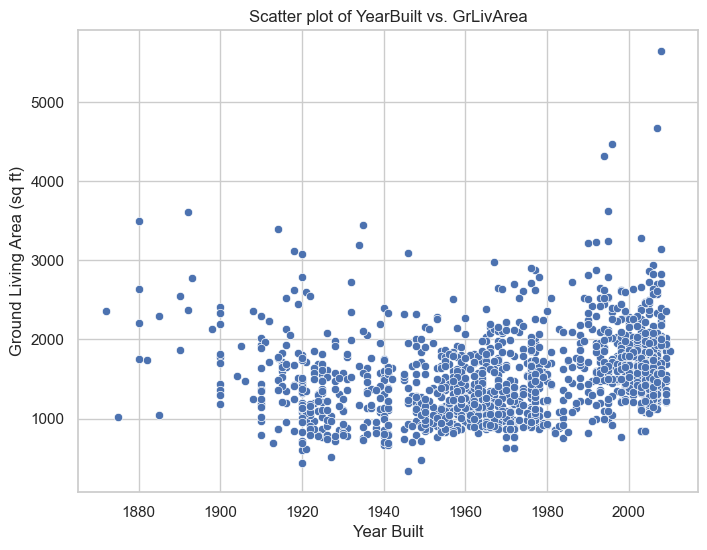

In [42]:
#  Scatter Plot of YearBuilt vs GrLivArea

test_df = pd.read_csv('test.csv')

# Set plot style
sns.set(style="whitegrid")

# Scatter Plot of YearBuilt vs GrLivArea
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='YearBuilt', y='GrLivArea')
plt.title('Scatter plot of YearBuilt vs. GrLivArea')
plt.xlabel('Year Built')
plt.ylabel('Ground Living Area (sq ft)')
plt.show()

## Q1 - Predicting House Prices

## Lasso Regression Model

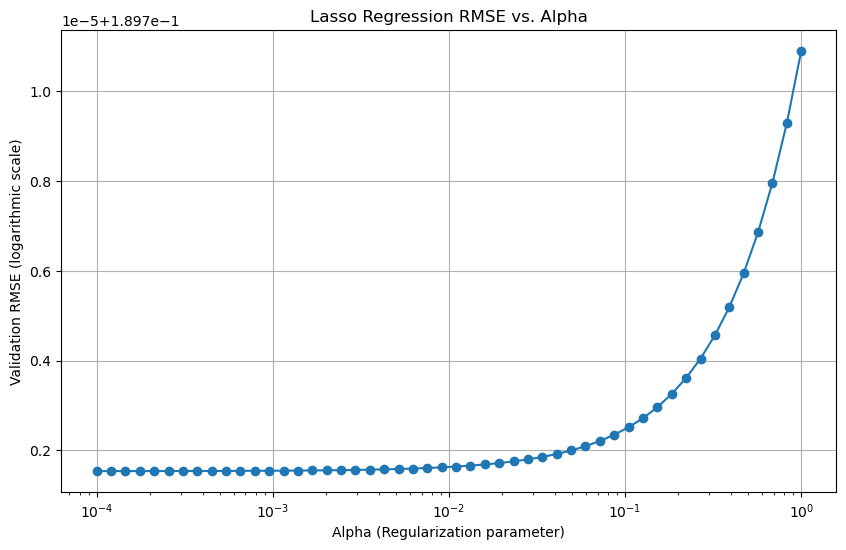

In [2]:
# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Data preparation
features = train_df.select_dtypes(include=[np.number]).drop(['Id', 'SalePrice'], axis=1).columns
mean_values = train_df[features].mean()  # Calculate mean only for numeric features
X = train_df[features].fillna(mean_values)  # Fill missing values with the calculated mean
y = train_df['SalePrice']

# Splitting data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables for plotting
alphas = np.logspace(-4, 0, 50)  # 50 values between 10^-4 and 10^0
rmse_vals = []

# Model training and evaluation
for alpha in alphas:
    model = Lasso(alpha=alpha, random_state=42)
    model.fit(X_train, y_train)
    predictions_val = model.predict(X_val)
    log_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(predictions_val)))
    rmse_vals.append(log_rmse)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(alphas, rmse_vals, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Regularization parameter)')
plt.ylabel('Validation RMSE (logarithmic scale)')
plt.title('Lasso Regression RMSE vs. Alpha')
plt.grid(True)
plt.show()


In [14]:
# Lasso Regression Model

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Data preparation
features = train_df.select_dtypes(include=[np.number]).drop(['Id', 'SalePrice'], axis=1).columns
mean_values = train_df[features].mean()  # Calculate mean only for numeric features
X = train_df[features].fillna(mean_values)  # Fill missing values with the calculated mean
y = train_df['SalePrice']

# Splitting data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization and training
model = Lasso(alpha=.01, random_state=42)  # alpha is a tuning parameter affecting how penalty is applied
model.fit(X_train, y_train)

# Predicting test data
test_features = test_df[features].fillna(mean_values)  # Use the same mean values for filling test data
test_predictions = model.predict(test_features)

# Create submission file
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission_lasso_regression.csv', index=False)

# Calculating RMSE using logarithms
log_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(predictions_val)))
print(f'Validation RMSE (logarithmic scale): {log_rmse}')

Validation RMSE (logarithmic scale): 0.15404594833283894


## Random Forest Model

C:\Users\s218515\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


OOB RMSE with 10 trees: 0.16602181485865006
OOB RMSE with 50 trees: 0.15446243375941687
OOB RMSE with 100 trees: 0.15412655555084592
OOB RMSE with 200 trees: 0.15437734088082378
OOB RMSE with 300 trees: 0.15404594833283894
OOB RMSE with 400 trees: 0.15407258710041102
OOB RMSE with 500 trees: 0.15425770387121085


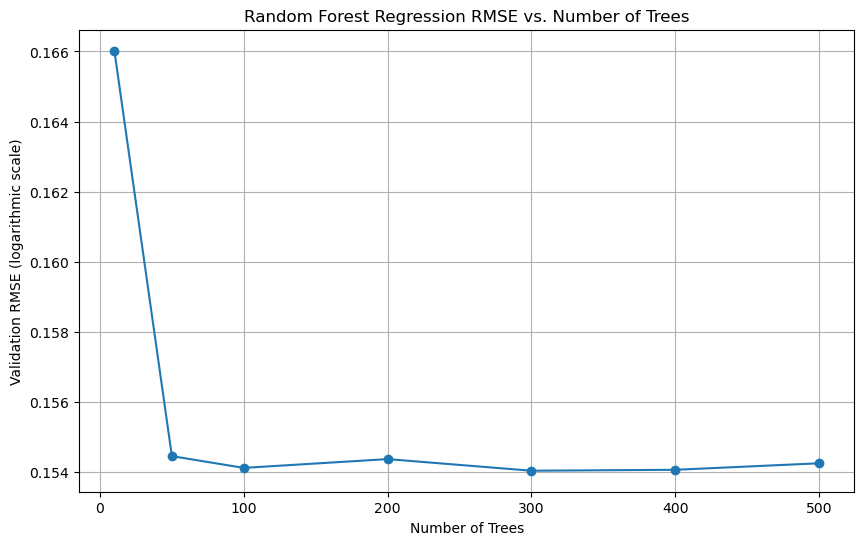

Best Model Validation RMSE (logarithmic scale): 0.15404594833283894


In [13]:
# Random Forest Model

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Prepare data
X = train_df.drop(['Id', 'SalePrice'], axis=1).select_dtypes(include=[np.number]).fillna(0)
y = train_df['SalePrice']

# Splitting data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model with more detailed logging
n_trees = [10, 50, 100, 200, 300, 400, 500]  # Different values for the number of trees
rmse_scores = []

for n in n_trees:
    model = RandomForestRegressor(n_estimators=n, random_state=42, oob_score=True)
    model.fit(X_train, y_train)
    oob_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(model.predict(X_val))))
    rmse_scores.append(oob_rmse)
    print(f'OOB RMSE with {n} trees: {oob_rmse}')

# Plotting RMSE against the number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_trees, rmse_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Validation RMSE (logarithmic scale)')
plt.title('Random Forest Regression RMSE vs. Number of Trees')
plt.grid(True)
plt.show()

# Continue with the best n_estimator based on previous RMSE results
best_n_estimator = n_trees[rmse_scores.index(min(rmse_scores))]
model = RandomForestRegressor(n_estimators=best_n_estimator, random_state=42)
model.fit(X_train, y_train)

# Predict on validation and test data
predictions_val = model.predict(X_val)
test_features = test_df.drop('Id', axis=1).select_dtypes(include=[np.number]).fillna(0)
test_predictions = model.predict(test_features)

# RMSE for the best model
log_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(predictions_val)))
print(f'Best Model Validation RMSE (logarithmic scale): {log_rmse}')

# Create submission file
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission_random_forest.csv', index=False)

## Gradient Boosting Model

Validation RMSE with 10 estimators: 0.2682241739221871
Validation RMSE with 20 estimators: 0.2056552874557367
Validation RMSE with 30 estimators: 0.1763117248892716
Validation RMSE with 40 estimators: 0.159752564489652
Validation RMSE with 50 estimators: 0.15053158286110857
Validation RMSE with 60 estimators: 0.14731065097310198
Validation RMSE with 70 estimators: 0.1459401441930658
Validation RMSE with 80 estimators: 0.14478862706074833
Validation RMSE with 90 estimators: 0.14378061934064096
Validation RMSE with 100 estimators: 0.14306673994166472


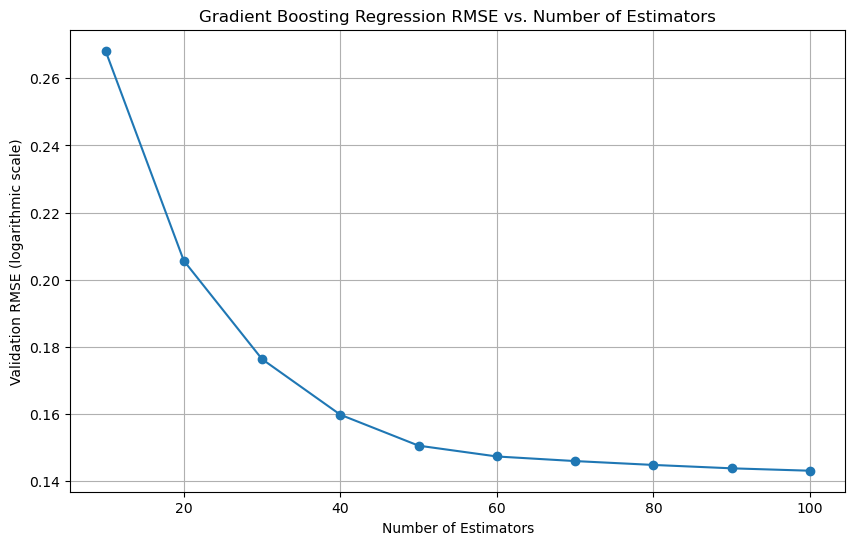

Final Model Validation RMSE (logarithmic scale): 0.14306673994166472


In [15]:
# Gradient Boosting model

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Data preparation
features = train_df.select_dtypes(include=[np.number]).drop(['Id', 'SalePrice'], axis=1).columns
mean_values = train_df[features].mean()
X = train_df[features].fillna(mean_values)
y = train_df['SalePrice']

# Splitting data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables for plotting
n_estimators_range = range(10, 101, 10)  # Testing with 10, 20, ..., 100 estimators
rmse_scores = []

# Model training with incremental number of estimators
for n_estimators in n_estimators_range:
    model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    predictions_val = model.predict(X_val)
    log_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(predictions_val)))
    rmse_scores.append(log_rmse)
    print(f'Validation RMSE with {n_estimators} estimators: {log_rmse}')

# Plotting RMSE against the number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, rmse_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Validation RMSE (logarithmic scale)')
plt.title('Gradient Boosting Regression RMSE vs. Number of Estimators')
plt.grid(True)
plt.show()

# Continue with the best model (optional, here assumed 100 as default)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predicting validation and test data
predictions_val = model.predict(X_val)
test_features = test_df[features].fillna(mean_values)
test_predictions = model.predict(test_features)

# Calculate final RMSE for the best model
log_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(predictions_val)))
print(f'Final Model Validation RMSE (logarithmic scale): {log_rmse}')

# Create submission file
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission_gradient_boosting.csv', index=False)

## Linear Regression Model

Validation RMSE (logarithmic scale): 0.1896561896891731


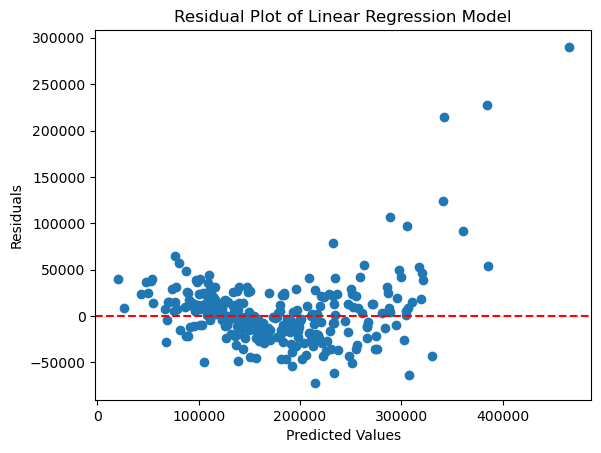

In [16]:
# Linear Regression Model

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Prepare data
imputer = SimpleImputer(strategy='mean')
X = train_df.select_dtypes(include=[np.number]).drop(['Id', 'SalePrice'], axis=1)
y = train_df['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)  # Split for validation

# Imputing missing values
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(test_df.select_dtypes(include=[np.number]).drop(['Id'], axis=1))

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction on validation set for RMSE calculation
predictions_val = model.predict(X_val)

# Calculating RMSE using logarithms
log_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(predictions_val)))
print(f'Validation RMSE (logarithmic scale): {log_rmse}')

# Plotting residuals
residuals = y_val - predictions_val
plt.scatter(predictions_val, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot of Linear Regression Model')
plt.show()

# Prediction on test set
predictions = model.predict(X_test)

# Save to CSV
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': predictions})
submission.to_csv('submission_linear_regression.csv', index=False)

## Decision Tree Regressor Model

Validation RMSE at depth 1: 0.3521368836643087
Validation RMSE at depth 2: 0.28401379937465826
Validation RMSE at depth 3: 0.2481311654079464
Validation RMSE at depth 4: 0.2288337144508904
Validation RMSE at depth 5: 0.2103224178957704
Validation RMSE at depth 6: 0.21470401749596218
Validation RMSE at depth 7: 0.2121392794141264
Validation RMSE at depth 8: 0.20798222834913374
Validation RMSE at depth 9: 0.21369103444749274
Validation RMSE at depth 10: 0.22193430650619692
Validation RMSE at depth 11: 0.22446158449060907
Validation RMSE at depth 12: 0.22916193798636852
Validation RMSE at depth 13: 0.2195071769978461
Validation RMSE at depth 14: 0.22384847264628738
Validation RMSE at depth 15: 0.22359163965436166
Validation RMSE at depth 16: 0.22957502198964397
Validation RMSE at depth 17: 0.21644742708553957
Validation RMSE at depth 18: 0.22380577214904987
Validation RMSE at depth 19: 0.2161507439971646
Validation RMSE at depth 20: 0.22569649861728966


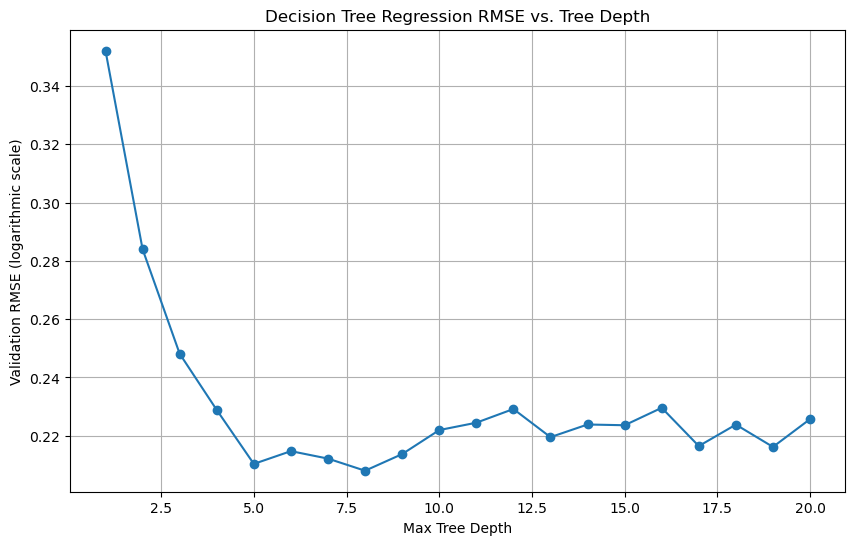

Final Model Validation RMSE (logarithmic scale): 0.20798222834913374


In [17]:
# Decision Tree Regressor Model

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Prepare data
imputer = SimpleImputer(strategy='mean')
# Splitting the dataset into training and validation sets
X = train_df.select_dtypes(include=[np.number]).drop(['Id', 'SalePrice'], axis=1)
y = train_df['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputing missing values
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(test_df.select_dtypes(include=[np.number]).drop(['Id'], axis=1))

# Initialize variables for plotting
max_depths = range(1, 21)  # Testing depths from 1 to 20
rmse_scores = []

# Model training with different tree depths
for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    predictions_val = model.predict(X_val)
    log_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(predictions_val)))
    rmse_scores.append(log_rmse)
    print(f'Validation RMSE at depth {depth}: {log_rmse}')

# Plotting RMSE against tree depth
plt.figure(figsize=(10, 6))
plt.plot(max_depths, rmse_scores, marker='o')
plt.xlabel('Max Tree Depth')
plt.ylabel('Validation RMSE (logarithmic scale)')
plt.title('Decision Tree Regression RMSE vs. Tree Depth')
plt.grid(True)
plt.show()

# Continue with the best depth based on previous RMSE results
best_depth = max_depths[rmse_scores.index(min(rmse_scores))]
model = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
model.fit(X_train, y_train)

# Prediction on validation and test data
predictions_val = model.predict(X_val)
predictions = model.predict(X_test)

# Calculate final RMSE for the best model
log_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(predictions_val)))
print(f'Final Model Validation RMSE (logarithmic scale): {log_rmse}')

# Save to CSV
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': predictions})
submission.to_csv('submission_decision_tree.csv', index=False)

## Random Forest Regressor Model

C:\Users\s218515\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Validation RMSE with 10 trees: 0.1662343720459083
Validation RMSE with 50 trees: 0.1553413724657581
Validation RMSE with 100 trees: 0.15472731915872182
Validation RMSE with 200 trees: 0.15538547182882992
Validation RMSE with 300 trees: 0.15488222094537213
Validation RMSE with 400 trees: 0.15460513670456424
Validation RMSE with 500 trees: 0.15461358292100666


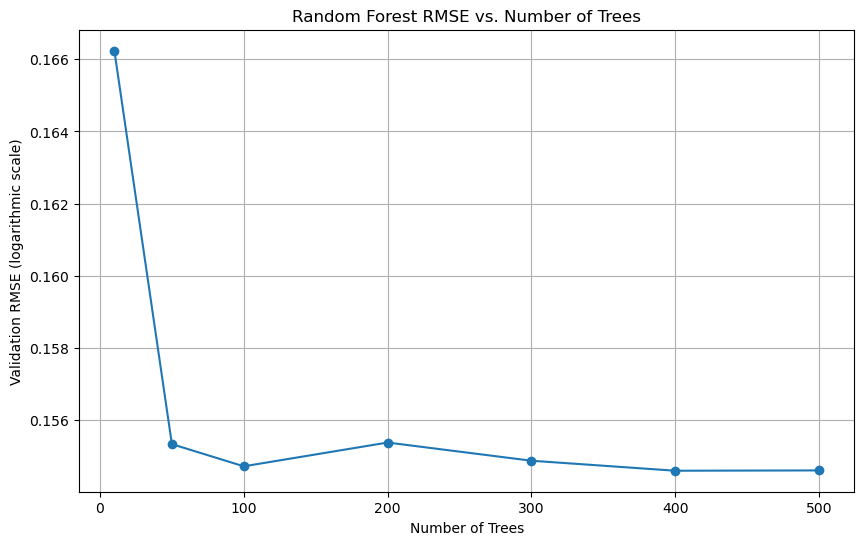

Final Model Validation RMSE (logarithmic scale): 0.15460513670456424


In [18]:
# Random Forest Regressor Model

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Prepare data
imputer = SimpleImputer(strategy='mean')
X = train_df.select_dtypes(include=[np.number]).drop(['Id', 'SalePrice'], axis=1)
y = train_df['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputing missing values
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(test_df.select_dtypes(include=[np.number]).drop(['Id'], axis=1))

# Model training with varying number of trees
n_estimators_options = [10, 50, 100, 200, 300, 400, 500]
rmse_values = []

for n_estimators in n_estimators_options:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42, oob_score=True)
    model.fit(X_train, y_train)
    predictions_val = model.predict(X_val)
    log_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(predictions_val)))
    rmse_values.append(log_rmse)
    print(f'Validation RMSE with {n_estimators} trees: {log_rmse}')

# Plotting RMSE vs. Number of Trees
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_options, rmse_values, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Validation RMSE (logarithmic scale)')
plt.title('Random Forest RMSE vs. Number of Trees')
plt.grid(True)
plt.show()

# Continue with the optimal number of trees
optimal_trees = n_estimators_options[rmse_values.index(min(rmse_values))]
model = RandomForestRegressor(n_estimators=optimal_trees, random_state=42)
model.fit(X_train, y_train)

# Predictions for final evaluation
final_predictions_val = model.predict(X_val)
final_log_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(final_predictions_val)))
print(f'Final Model Validation RMSE (logarithmic scale): {final_log_rmse}')

# Prediction on test set
final_predictions = model.predict(X_test)

# Save to CSV
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': final_predictions})
submission.to_csv('submission_forest_regressor.csv', index=False)

## Support Vector Regression (SVR) Model

Validation RMSE with C=0.01: 0.43228288619351873
Validation RMSE with C=0.027825594022071243: 0.4322771977527251
Validation RMSE with C=0.0774263682681127: 0.4322613912791919
Validation RMSE with C=0.21544346900318834: 0.43221741006922215
Validation RMSE with C=0.5994842503189409: 0.43209503936337396
Validation RMSE with C=1.6681005372000592: 0.43175461034100365
Validation RMSE with C=4.6415888336127775: 0.43081992120251567
Validation RMSE with C=12.915496650148826: 0.4281888182606385
Validation RMSE with C=35.93813663804626: 0.42111674893938306
Validation RMSE with C=100.0: 0.4021488535203938


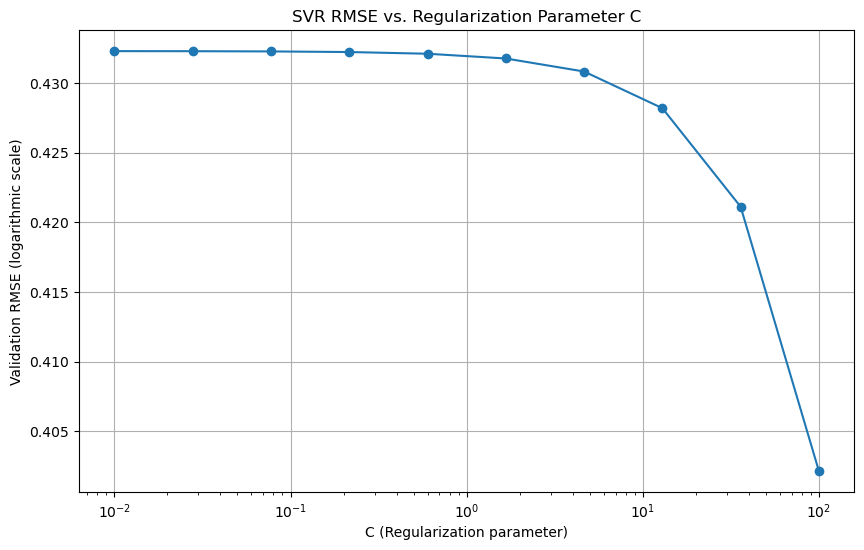

Final Model Validation RMSE (logarithmic scale): 0.4021488535203938


In [19]:
# Support Vector Regression (SVR) Model

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Prepare data
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
X = train_df.select_dtypes(include=[np.number]).drop(['Id', 'SalePrice'], axis=1)
y = train_df['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputing missing values and scaling
X_train = scaler.fit_transform(imputer.fit_transform(X_train))
X_val = scaler.transform(imputer.transform(X_val))
X_test = scaler.transform(imputer.transform(test_df.select_dtypes(include=[np.number]).drop(['Id'], axis=1)))

# Model training with varying C values
C_values = np.logspace(-2, 2, 10)  # C values from 0.01 to 100 on a logarithmic scale
rmse_values = []

for C in C_values:
    model = SVR(C=C)
    model.fit(X_train, y_train)
    predictions_val = model.predict(X_val)
    log_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(predictions_val)))
    rmse_values.append(log_rmse)
    print(f'Validation RMSE with C={C}: {log_rmse}')

# Plotting RMSE vs. C values
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, rmse_values, marker='o')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Validation RMSE (logarithmic scale)')
plt.title('SVR RMSE vs. Regularization Parameter C')
plt.grid(True)
plt.show()

# Continue with the optimal C value
optimal_C = C_values[rmse_values.index(min(rmse_values))]
model = SVR(C=optimal_C)
model.fit(X_train, y_train)

# Final predictions
final_predictions_val = model.predict(X_val)
final_predictions = model.predict(X_test)

# Final RMSE calculation
final_log_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(final_predictions_val)))
print(f'Final Model Validation RMSE (logarithmic scale): {final_log_rmse}')

# Save to CSV
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': final_predictions})
submission.to_csv('submission_svr.csv', index=False)

## K-Nearest Neighbors Regressor Model

Validation RMSE with 1 neighbors: 0.23405686642275
Validation RMSE with 2 neighbors: 0.21054217941447706
Validation RMSE with 3 neighbors: 0.20548274884018689
Validation RMSE with 4 neighbors: 0.2067920275398134
Validation RMSE with 5 neighbors: 0.20416957386690346
Validation RMSE with 6 neighbors: 0.20061281158254307
Validation RMSE with 7 neighbors: 0.20295044826961986
Validation RMSE with 8 neighbors: 0.2029950516485167
Validation RMSE with 9 neighbors: 0.20255122795744027
Validation RMSE with 10 neighbors: 0.2040287445662583
Validation RMSE with 11 neighbors: 0.2037839686424267
Validation RMSE with 12 neighbors: 0.2048289413952637
Validation RMSE with 13 neighbors: 0.20538864296318152
Validation RMSE with 14 neighbors: 0.20697870283827793
Validation RMSE with 15 neighbors: 0.2076969628884134
Validation RMSE with 16 neighbors: 0.20865707622585344
Validation RMSE with 17 neighbors: 0.20945931412209165
Validation RMSE with 18 neighbors: 0.20913361959366603
Validation RMSE with 19 neig

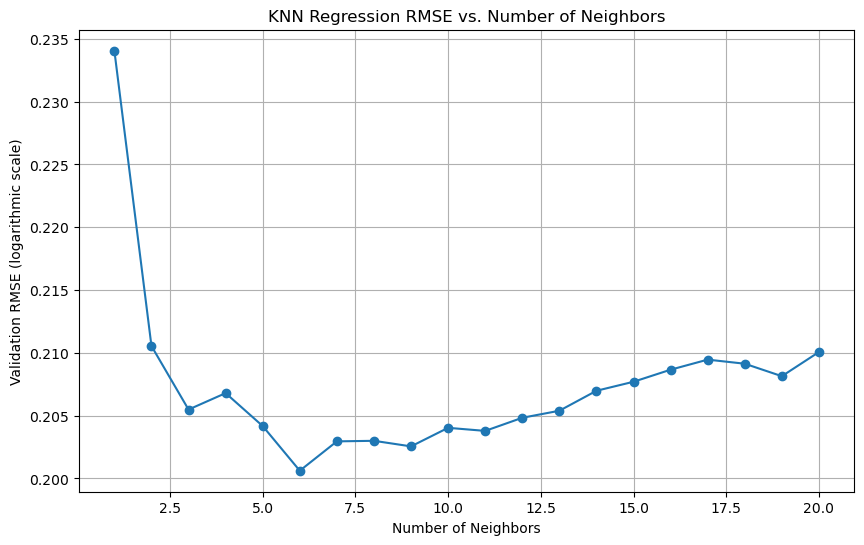

Final Model Validation RMSE (logarithmic scale): 0.20061281158254307


In [20]:
# K-Nearest Neighbors Regressor Model

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Prepare data
imputer = SimpleImputer(strategy='mean')
scaler = MinMaxScaler()
X = train_df.select_dtypes(include=[np.number]).drop(['Id', 'SalePrice'], axis=1)
y = train_df['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputing missing values and scaling
X_train = scaler.fit_transform(imputer.fit_transform(X_train))
X_val = scaler.transform(imputer.transform(X_val))
X_test = scaler.transform(imputer.transform(test_df.select_dtypes(include=[np.number]).drop(['Id'], axis=1)))

# Initialize variables for plotting
neighbors_range = range(1, 21)  # Testing with 1 to 20 neighbors
rmse_values = []

# Model training with different numbers of neighbors
for n_neighbors in neighbors_range:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    predictions_val = model.predict(X_val)
    log_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(predictions_val)))
    rmse_values.append(log_rmse)
    print(f'Validation RMSE with {n_neighbors} neighbors: {log_rmse}')

# Plotting RMSE vs. Number of Neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, rmse_values, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Validation RMSE (logarithmic scale)')
plt.title('KNN Regression RMSE vs. Number of Neighbors')
plt.grid(True)
plt.show()

# Continue with the optimal number of neighbors
optimal_neighbors = neighbors_range[rmse_values.index(min(rmse_values))]
model = KNeighborsRegressor(n_neighbors=optimal_neighbors)
model.fit(X_train, y_train)

# Final predictions
final_predictions_val = model.predict(X_val)
final_predictions = model.predict(X_test)

# Final RMSE calculation
final_log_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(final_predictions_val)))
print(f'Final Model Validation RMSE (logarithmic scale): {final_log_rmse}')

# Save to CSV
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': final_predictions})
submission.to_csv('submission_knn.csv', index=False)

## Blending all Models

In [21]:
models = {
    "Lasso": Lasso(alpha=1.0, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

validation_predictions = []
test_predictions = []

for name, model in models.items():
    model.fit(X_train, y_train)
    # Collect predictions for validation set
    val_pred = model.predict(X_val)
    validation_predictions.append(val_pred)
    # Collect predictions for test set
    test_pred = model.predict(X_test)
    test_predictions.append(test_pred)

# Convert lists to numpy arrays for easier manipulation
validation_predictions = np.column_stack(validation_predictions)
test_predictions = np.column_stack(test_predictions)

final_predictions_simple_average = np.mean(validation_predictions, axis=1)
simple_blend_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(final_predictions_simple_average)))
print(f"Validation RMSE for simple average blend: {simple_blend_rmse}")

final_test_predictions_simple_average = np.mean(test_predictions, axis=1)

blender = LinearRegression()
blender.fit(validation_predictions, y_val)
final_predictions_blender = blender.predict(validation_predictions)

blender_rmse = np.sqrt(mean_squared_error(y_val, final_predictions_blender))
print(f"Validation RMSE for linear regression blender: {blender_rmse}")

final_test_predictions_blender = blender.predict(test_predictions)

# Using simple average for submission
submission_simple = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': final_test_predictions_simple_average})
submission_simple.to_csv('submission_simple_average.csv', index=False)

# Using blender for submission
submission_blender = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': final_test_predictions_blender})
submission_blender.to_csv('submission_blender.csv', index=False)


C:\Users\s218515\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.423e+09, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Validation RMSE for simple average blend: 0.16307987309213423
Validation RMSE for linear regression blender: 26117.286407322554


# Summary Statistics

## Train CSV file

In [23]:
# Load the train CSV file
data = pd.read_csv('train.csv')

# Display summary statistics
sale_price_stats = data['SalePrice'].describe()
print(sale_price_stats)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


## Sample submission CSV file

In [24]:
# Load the sample submission CSV file
data = pd.read_csv('sample_submission.csv')

# Display summary statistics
sale_price_stats = data['SalePrice'].describe()
print(sale_price_stats)

count      1459.000000
mean     179183.918243
std       16518.303051
min      135751.318893
25%      168703.011202
50%      179208.665698
75%      186789.409363
max      281643.976117
Name: SalePrice, dtype: float64


## Lasso Regression CSV file

In [25]:
# Load the CSV file
data = pd.read_csv('submission_lasso_regression.csv')

# Display statistical summary for numerical columns
summary = data.describe()

# Print the summary
print(summary)

                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  177179.059440
std     421.321334   70487.128423
min    1461.000000    1512.492405
25%    1825.500000  127122.665759
50%    2190.000000  167110.290895
75%    2554.500000  222194.958299
max    2919.000000  592969.596198


## KNN CSV file

In [26]:
# Load the CSV file
data = pd.read_csv('submission_knn.csv')

# Display statistical summary for numerical columns
summary = data.describe()

# Print the summary
print(summary)

                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  174178.653758
std     421.321334   62671.210426
min    1461.000000   69716.666667
25%    1825.500000  128348.916667
50%    2190.000000  156583.333333
75%    2554.500000  205190.833333
max    2919.000000  412622.833333


## SVR CSV file

In [27]:
# Load the CSV file
data = pd.read_csv('submission_svr.csv')

# Display statistical summary for numerical columns
summary = data.describe()

# Print the summary
print(summary)

                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  164821.317446
std     421.321334    6220.690832
min    1461.000000  152150.168626
25%    1825.500000  159570.481540
50%    2190.000000  164775.829086
75%    2554.500000  170042.346979
max    2919.000000  177150.228918


## Forest Regressor CSV file

In [28]:
# Load the CSV file
data = pd.read_csv('submission_forest_regressor.csv')

# Display statistical summary for numerical columns
summary = data.describe()

# Print the summary
print(summary)

                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  178757.312003
std     421.321334   71372.729255
min    1461.000000   59723.125000
25%    1825.500000  129153.836250
50%    2190.000000  158048.197500
75%    2554.500000  209538.311250
max    2919.000000  507914.827500


## Decision Tree CSV file

In [29]:
# Load the CSV file
data = pd.read_csv('submission_decision_tree.csv')

# Display statistical summary for numerical columns
summary = data.describe()

# Print the summary
print(summary)

                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  178935.943480
std     421.321334   77175.710269
min    1461.000000   57288.888889
25%    1825.500000  128071.875000
50%    2190.000000  159966.666667
75%    2554.500000  204500.000000
max    2919.000000  745000.000000


## Linear Regression CSV file

In [30]:
# Load the CSV file
data = pd.read_csv('submission_linear_regression.csv')

# Display statistical summary for numerical columns
summary = data.describe()

# Print the summary
print(summary)

                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  177180.223345
std     421.321334   70487.772118
min    1461.000000    1495.907874
25%    1825.500000  127085.650626
50%    2190.000000  167125.626787
75%    2554.500000  222199.199332
max    2919.000000  593024.130582


## Gradient Boosting CSV file

In [31]:
# Load the CSV file
data = pd.read_csv('submission_gradient_boosting.csv')

# Display statistical summary for numerical columns
summary = data.describe()

# Print the summary
print(summary)

                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  179160.223448
std     421.321334   75159.616047
min    1461.000000   50781.521559
25%    1825.500000  129071.970386
50%    2190.000000  158581.564711
75%    2554.500000  209158.547107
max    2919.000000  525118.711385


## Random Forest CSV file

In [32]:
# Load the CSV file
data = pd.read_csv('submission_random_forest.csv')

# Display statistical summary for numerical columns
summary = data.describe()

# Print the summary
print(summary)

                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  178634.571177
std     421.321334   71277.477837
min    1461.000000   58064.833333
25%    1825.500000  129201.886667
50%    2190.000000  158674.326667
75%    2554.500000  209450.581667
max    2919.000000  505320.830000


## Simple Average Blend  CSV file

In [33]:
# Load the CSV file
data = pd.read_csv('submission_simple_average.csv')

# Display statistical summary for numerical columns
summary = data.describe()

# Print the summary
print(summary)

                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  175737.696767
std     421.321334   59198.422927
min    1461.000000   63279.938747
25%    1825.500000  134227.905039
50%    2190.000000  161448.876446
75%    2554.500000  204910.133631
max    2919.000000  411529.889094


## Linear Regression Blender CSV file

In [34]:
# Load the CSV file
data = pd.read_csv('submission_blender.csv')

# Display statistical summary for numerical columns
summary = data.describe()

# Print the summary
print(summary)

                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  180346.793854
std     421.321334   79756.274062
min    1461.000000   44954.720963
25%    1825.500000  127534.961159
50%    2190.000000  157913.483581
75%    2554.500000  211502.619365
max    2919.000000  547802.446063


# Q2 & Q3  - Strongest and Weakest Correlation with Sale Price - Random Forest Model

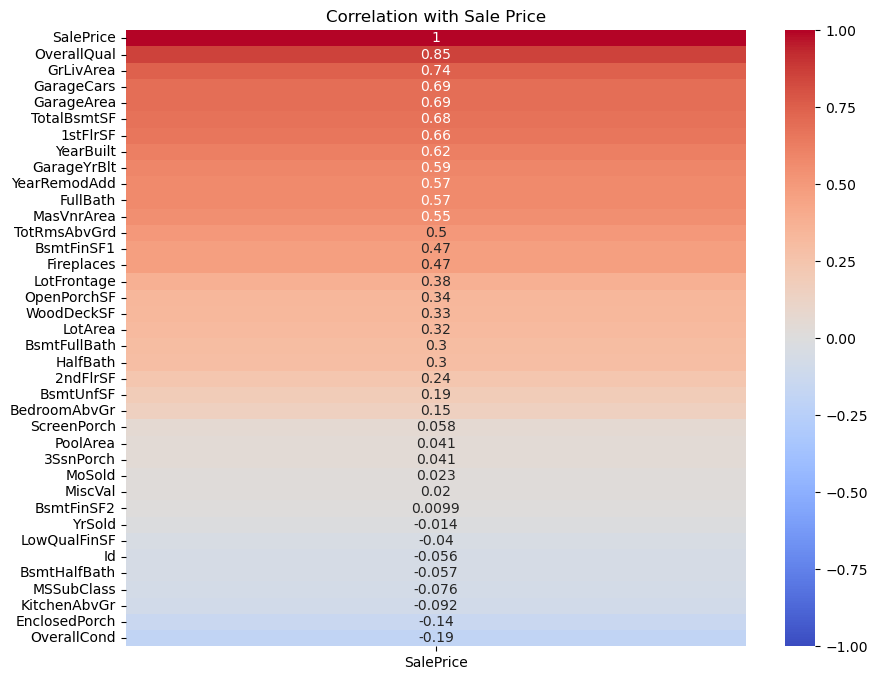

In [35]:
# Correlation with Sale Price 

# Load the dataset
data = pd.read_csv('test_random_forest.csv')

# Exclude non-numeric columns from the correlation computation
numeric_data = data.select_dtypes(include=[np.number])  # only use numeric data

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Focus on the 'SalePrice' correlations
sale_price_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Visualize the correlation matrix focused on 'SalePrice'
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Sale Price')
plt.show()

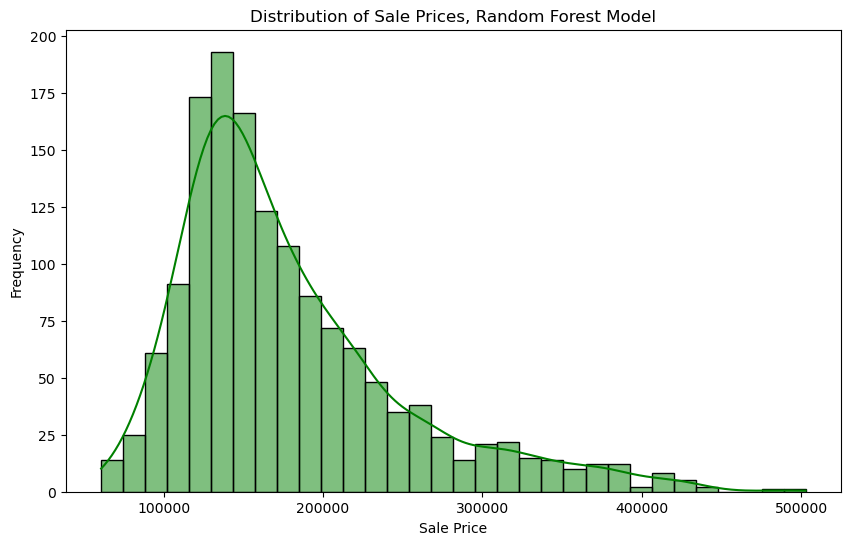

In [15]:
# Histogram of SalePrice - Random Forest Model

# Load the dataset
data = pd.read_csv('test_random_forest.csv')

plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True, color='green')
plt.title('Distribution of Sale Prices, Random Forest Model')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Q2 & Q3  - Strongest and Weakest Correlation with Sale Price - Gradient Boosting Model

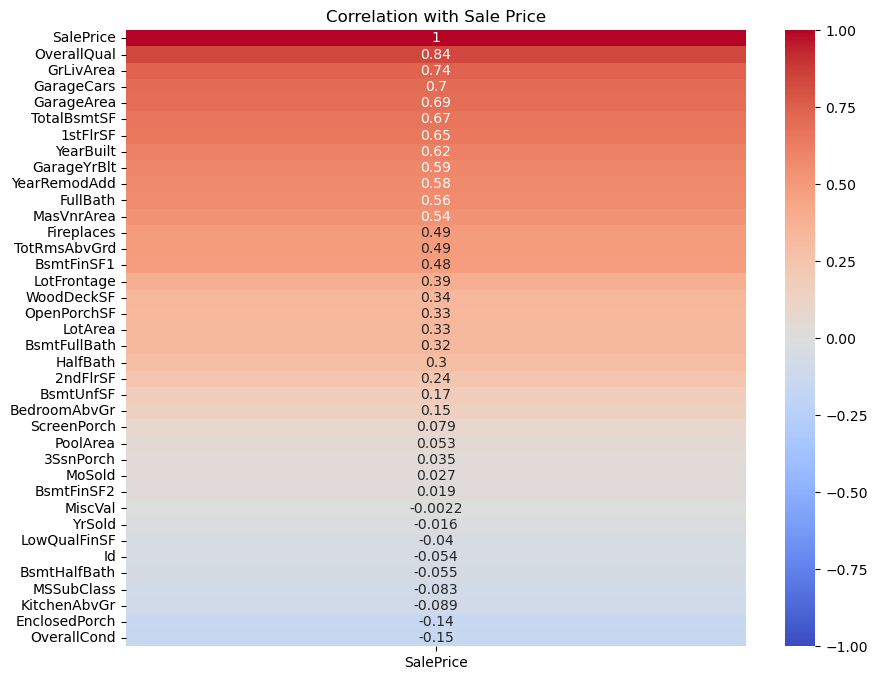

In [20]:
# Correlation with Sale Price - Gradient Boosting Model

# Load the dataset
data = pd.read_csv('test_gradient_boosting.csv')

# Exclude non-numeric columns from the correlation computation
numeric_data = data.select_dtypes(include=[np.number])  # only use numeric data

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Focus on the 'SalePrice' correlations
sale_price_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Visualize the correlation matrix focused on 'SalePrice'
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Sale Price')
plt.show()

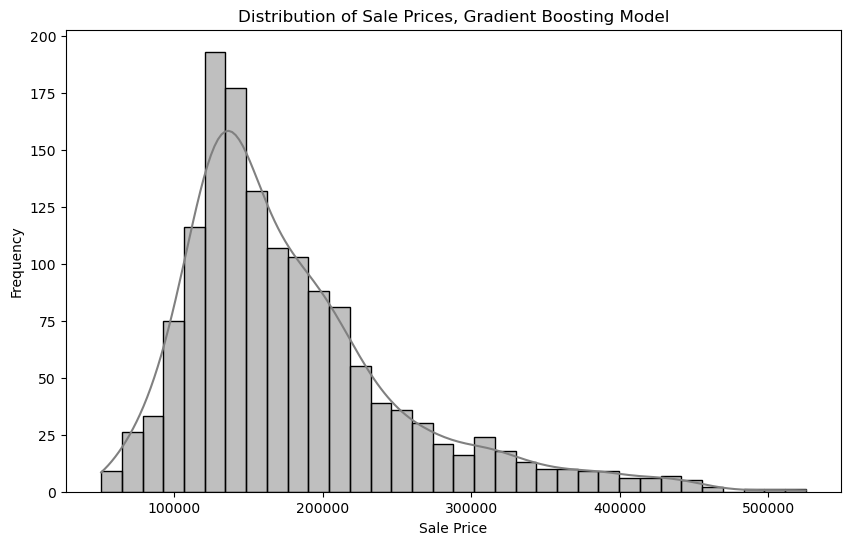

In [16]:
# Histogram of SalePrice - Gradient Boosting Model

# Load the dataset
data = pd.read_csv('test_gradient_boosting.csv')

plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True, color='gray')
plt.title('Distribution of Sale Prices, Gradient Boosting Model')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Q2 & Q3  - Strongest and Weakest Correlation with Sale Price - Simple Average Blend Model

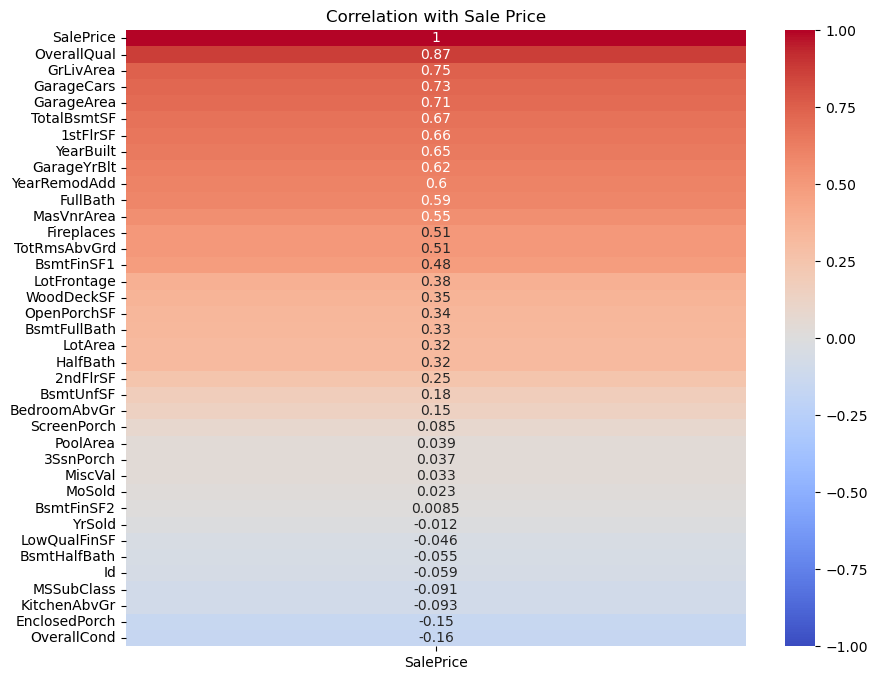

In [21]:
# Correlation with Sale Price 

# Load the dataset
data = pd.read_csv('test_simple_average.csv')

# Exclude non-numeric columns from the correlation computation
numeric_data = data.select_dtypes(include=[np.number])  # only use numeric data

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Focus on the 'SalePrice' correlations
sale_price_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Visualize the correlation matrix focused on 'SalePrice'
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Sale Price')
plt.show()

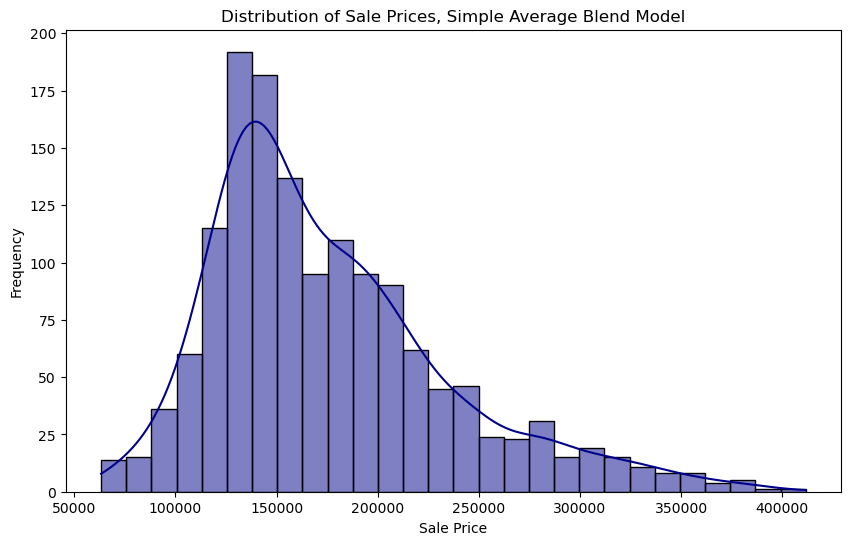

In [18]:
# Histogram of SalePrice - Simple Average Blend Model

# Load the dataset
data = pd.read_csv('test_simple_average.csv')

plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True, color='darkblue')
plt.title('Distribution of Sale Prices, Simple Average Blend Model')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()